In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import os 
import sys 
from astropy.io import fits 
import pandas as pd 
import tensorflow as tf 
sys.path.append("C:/Users/User/dev/kepler")
%load_ext autoreload
%autoreload 2
from python_tools.plot import plot, plot1d

In [2]:
# from config import * 
from models.model import get_model
from models import *
from train import * 
from models.resNet import get_resnet_model
from models.dense import get_dense
from clean_utils.io import * 

img_dir = "C:/Users/User/Desktop/Probation/"
data_dir = 'C:/Users/User/dev/data/train/flux'
feature = 'C:/Users/User/dev/data/train/features/f1.txt'

In [3]:
(g_train_x, l_train_x, train_y), (g_test_x, l_test_x, test_y), (train_features, test_features) \
        = load_data(more_features=1)

# (g_train_x, l_train_x, train_y), (g_test_x, l_test_x, test_y) \
#         = load_data(more_features=0)

loading data from C:/Users/User/dev/data/train\flux\all_PCs_flux.txt
finished loading
loading data from C:/Users/User/dev/data/train\flux\all_Non_PCs_flux.txt
finished loading
loading data from C:/Users/User/dev/data/train\flux\local_all_PCs_flux.txt
finished loading
loading data from C:/Users/User/dev/data/train\flux\local_all_Non_PCs_flux.txt
finished loading
shffuling...
finised shuffing


In [4]:
# save the best model
l_test_x.shape, test_y.shape,g_test_x.shape
g_train_x.shape, l_train_x.shape, g_test_x.shape

((14163, 2001, 1), (14163, 201, 1), (1574, 2001, 1))

In [5]:
# augment data
aug_g_x, aug_l_x, aug_y, aug_features = augment_data(g_train_x, l_train_x, train_y, train_features)
aug_g_x.shape, aug_y.shape , g_train_x.shape

((28326, 2001, 1), (28326,), (14163, 2001, 1))

In [6]:
dense = get_dense()
dense.summary()

W0904 19:59:00.634793 23768 deprecation.py:506] From c:\users\user\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense (Dense)                (None, 512)               9216      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0     

In [7]:
set_lr(dense, 0.4e-3)
dense.fit(train_features,train_y, epochs=200, batch_size=128, validation_split=0.2)

set learning rate to 0.00039999998989515007
Train on 11330 samples, validate on 2833 samples
Epoch 1/200
11330/11330 [==============================] - 1s 74us/sample - loss: 0.3152 - acc: 0.8538 - val_loss: 0.2536 - val_acc: 0.8962
Epoch 2/200
11330/11330 [==============================] - 0s 34us/sample - loss: 0.2456 - acc: 0.8972 - val_loss: 0.2417 - val_acc: 0.9026
Epoch 3/200
11330/11330 [==============================] - 0s 35us/sample - loss: 0.2403 - acc: 0.9014 - val_loss: 0.2337 - val_acc: 0.9118
Epoch 4/200
11330/11330 [==============================] - 0s 34us/sample - loss: 0.2301 - acc: 0.9034 - val_loss: 0.2302 - val_acc: 0.9110
Epoch 5/200
11330/11330 [==============================] - 0s 34us/sample - loss: 0.2259 - acc: 0.9066 - val_loss: 0.2268 - val_acc: 0.9149
Epoch 6/200
11330/11330 [==============================] - 0s 35us/sample - loss: 0.2223 - acc: 0.9062 - val_loss: 0.2256 - val_acc: 0.9174
Epoch 7/200
11330/11330 [==============================] - 0s 33us/

11330/11330 [==============================] - 0s 32us/sample - loss: 0.1831 - acc: 0.9267 - val_loss: 0.2078 - val_acc: 0.9259
Epoch 59/200
11330/11330 [==============================] - 0s 33us/sample - loss: 0.1844 - acc: 0.9253 - val_loss: 0.2081 - val_acc: 0.9266
Epoch 60/200
11330/11330 [==============================] - 0s 33us/sample - loss: 0.1811 - acc: 0.9244 - val_loss: 0.2090 - val_acc: 0.9280
Epoch 61/200
11330/11330 [==============================] - 0s 32us/sample - loss: 0.1844 - acc: 0.9236 - val_loss: 0.2098 - val_acc: 0.9259
Epoch 62/200
11330/11330 [==============================] - 0s 38us/sample - loss: 0.1830 - acc: 0.9267 - val_loss: 0.2080 - val_acc: 0.9238
Epoch 63/200
11330/11330 [==============================] - 0s 35us/sample - loss: 0.1813 - acc: 0.9250 - val_loss: 0.2079 - val_acc: 0.9245
Epoch 64/200
11330/11330 [==============================] - 0s 36us/sample - loss: 0.1819 - acc: 0.9267 - val_loss: 0.2060 - val_acc: 0.9259
Epoch 65/200
11330/11330 [

11330/11330 [==============================] - 0s 31us/sample - loss: 0.1718 - acc: 0.9278 - val_loss: 0.2234 - val_acc: 0.9192
Epoch 117/200
11330/11330 [==============================] - 0s 34us/sample - loss: 0.1701 - acc: 0.9295 - val_loss: 0.2176 - val_acc: 0.9209
Epoch 118/200
11330/11330 [==============================] - 0s 35us/sample - loss: 0.1667 - acc: 0.9299 - val_loss: 0.2211 - val_acc: 0.9220
Epoch 119/200
11330/11330 [==============================] - 0s 33us/sample - loss: 0.1664 - acc: 0.9312 - val_loss: 0.2271 - val_acc: 0.9202
Epoch 120/200
11330/11330 [==============================] - 0s 35us/sample - loss: 0.1655 - acc: 0.9310 - val_loss: 0.2272 - val_acc: 0.9209
Epoch 121/200
11330/11330 [==============================] - 0s 38us/sample - loss: 0.1662 - acc: 0.9312 - val_loss: 0.2417 - val_acc: 0.9192
Epoch 122/200
11330/11330 [==============================] - 0s 34us/sample - loss: 0.1651 - acc: 0.9305 - val_loss: 0.2281 - val_acc: 0.9202
Epoch 123/200
11330/

KeyboardInterrupt: 

In [23]:
# m = load_model()
# m = get_resnet_model()
m = get_model(dense=dense)
# m.summary()


6 global res_blocks
8 local res_blocks
setting dense model NOT trainable


In [24]:
set_lr(m, 0.2e-3)

mycallback = LowerLr([5,5],[0.8e-3, 0.4e-4])

# (g_train_x, g_val_x), (l_train_x, l_val_x ), (train_y, val_y) = next(spliter)
m.fit([aug_g_x, aug_l_x, aug_features], aug_y, epochs=15, batch_size=128, 
         validation_split=0.1, callbacks=[mycallback], verbose=1)

set learning rate to 0.00019999999494757503
Train on 25493 samples, validate on 2833 samples
Set Learning Rate: 0.0008
Epoch 1/15
25493/25493 [==============================] - 26s 1ms/sample - loss: 0.3966 - acc: 0.9147 - val_loss: 0.2443 - val_acc: 0.9478
Epoch 2/15
25493/25493 [==============================] - 19s 741us/sample - loss: 0.2193 - acc: 0.9456 - val_loss: 0.1864 - val_acc: 0.9622
Epoch 3/15
25493/25493 [==============================] - 20s 794us/sample - loss: 0.1885 - acc: 0.9508 - val_loss: 0.1702 - val_acc: 0.9615
Epoch 4/15
25493/25493 [==============================] - 19s 737us/sample - loss: 0.1703 - acc: 0.9515 - val_loss: 0.1623 - val_acc: 0.9573
Epoch 5/15
25493/25493 [==============================] - 20s 783us/sample - loss: 0.1599 - acc: 0.9527 - val_loss: 0.1542 - val_acc: 0.9573
Set Learning Rate: 4e-05
Epoch 6/15
25493/25493 [==============================] - 19s 750us/sample - loss: 0.1479 - acc: 0.9572 - val_loss: 0.1481 - val_acc: 0.9622
Epoch 7/15
2

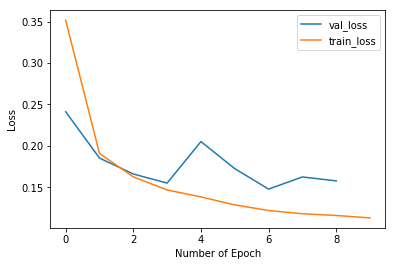

In [11]:
plt.plot(m.history.history['val_loss'][0:-1], label='val_loss')
plt.plot(m.history.history['loss'][0:-1], label='train_loss')
plt.xlabel('Number of Epoch')
plt.ylabel('Loss')
plt.legend()
# plt.savefig(img_dir+'/train_val_loss.png', dpi=200)

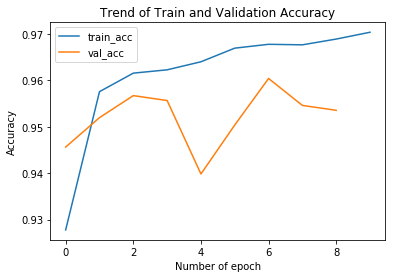

In [12]:
plt.plot(m.history.history['acc'][:-1], label='train_acc')
plt.plot(m.history.history['val_acc'][:-1], label='val_acc')
plt.xlabel('Number of epoch')
plt.ylabel('Accuracy')
plt.title('Trend of Train and Validation Accuracy')
plt.legend()
# plt.savefig('C:/Users/User/Desktop/Probation/train_val_acc.png', dpi=200)

In [36]:
# m = load_model()
m.evaluate([g_test_x, l_test_x, test_features], test_y)
dense.evaluate(test_features, test_y)
save_model(m)
# save_train_test_data("C:/Users/User/dev/data/best/", *(g_train_x, l_train_x, train_y), *(g_test_x, l_test_x, test_y) )

1574/1574 [==============================] - 0s 145us/sample - loss: 0.1936 - acc: 0.9263
saving to C:\Users\User\dev\kepler\models\train.h5
finished saving


In [37]:
2380/15737

0.15123594077651395

In [42]:
pred = m.predict([g_test_x, l_test_x])

In [17]:
pred_class = np.where(pred[:,1]>0.5, 1, 0)

NameError: name 'pred' is not defined

In [158]:
load_model()

W0903 00:27:31.366357 11848 deprecation.py:506] From c:\users\user\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0903 00:27:31.367357 11848 deprecation.py:506] From c:\users\user\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


loading model from C:\Users\User\dev\kepler\models\train.h5
finished loading


'1.14.0'

In [16]:
sum(pred_class==test_y)/len(test_y)

NameError: name 'pred_class' is not defined

In [26]:
get_model_summary(m, [g_test_x, l_test_x, test_features], test_y, 0.5)

{'Accuracy': 0.9536213468869124,
 'Precision': 0.8865979381443299,
 'Recall': 0.9222520107238605,
 'F1': 0.9040735873850196}

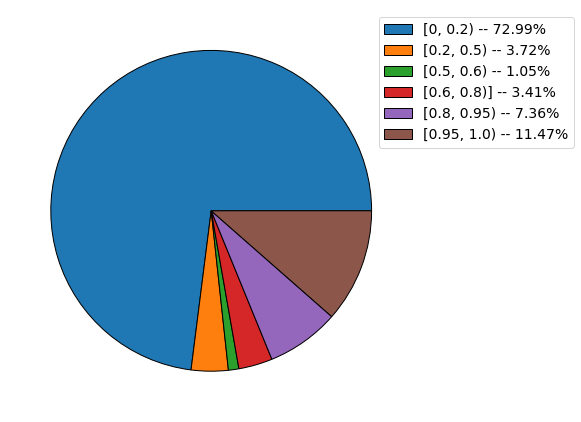

In [27]:
# plot the pie chart 
pred = m.predict([g_train_x, l_train_x, train_features])[:,1]

plt.figure(figsize=(8,8))
mask1 = pred < 0.20
mask2 = np.logical_and(pred >=0.20, pred < 0.5) 
mask3 = np.logical_and(pred >=0.5, pred < 0.6) 
mask4 = np.logical_and(pred >=0.6, pred < 0.8)
mask5 = np.logical_and(pred >=0.8, pred < 0.95)
mask6 = pred > 0.95

labels = ["[0, 0.2)", '[0.2, 0.5)', '[0.5, 0.6)','[0.6, 0.8)]', '[0.8, 0.95)', '[0.95, 1.0)']
sizes = [len(pred[mask1]),len(pred[mask2]),len(pred[mask3]),len(pred[mask4]), len(pred[mask5]), len(pred[mask6])]

labels = [f'{label} -- {sizes[i]/len(pred)*100:.2f}%' for i, label in enumerate(labels)]

patches, texts = plt.pie(sizes)
plt.legend(patches, labels, loc='best', bbox_to_anchor=(0.9, 1.),
           fontsize=14)
plt.tight_layout()

plt.savefig(img_dir + '/predict_percent.png', dpi=200, bbox_inches='tight')

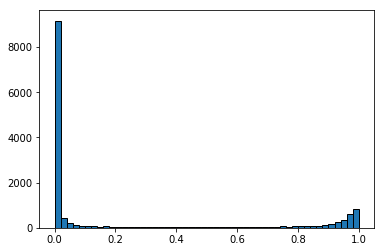

In [28]:
plt.hist(pred, bins=50)
plt.savefig(img_dir + '/hist.png', dpi=200)

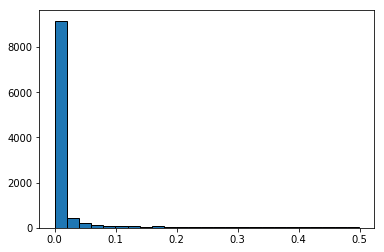

In [29]:
plt.hist(pred[pred < 0.5], bins=25)
plt.savefig(img_dir + '/hist_non_pc.png', dpi=200)

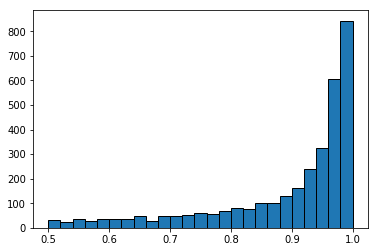

In [30]:
plt.hist(pred[pred >= 0.5], bins=25)
plt.savefig(img_dir + '/hist_pc.png', dpi=200)

In [31]:
x = np.linspace(0.01, 0.99, 30)
acc = []
precision = []
recall = [] 
f1 = []
for i, val in enumerate(x[:-1]):
    sys.stdout.write(f'\r {i+1}/{len(x[:-1])}')
    stats = get_model_summary(m, [g_test_x, l_test_x, test_features], test_y, val)
    acc.append(stats['Accuracy'])
    precision.append(stats['Precision'])
    recall.append(stats['Recall'])
    f1.append(stats['F1'])

 29/29

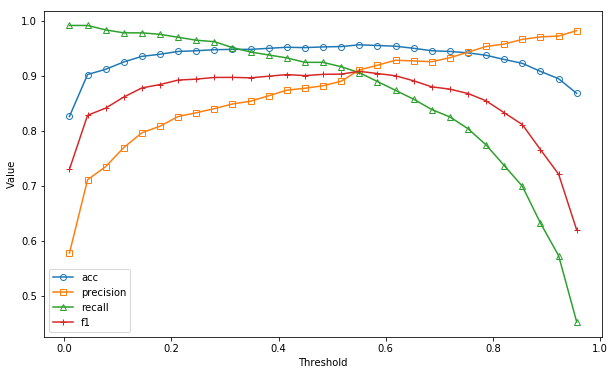

In [32]:
plt.figure(figsize=(10,6))
plt.plot(x[:-1], acc, 'o-', label='acc', ms=6.0, fillstyle='none')
plt.plot(x[:-1], precision,  's-', label='precision',ms=6.0, fillstyle='none')
plt.plot(x[:-1], recall, '^-', label='recall',ms=6.0, fillstyle='none')
plt.plot(x[:-1], f1,'+-', label='f1',ms=6.0, fillstyle='none' )

plt.ylabel('Value')
plt.xlabel('Threshold')
plt.legend()
plt.savefig(img_dir+"/stats_vs_threshold.png", dpi=200)

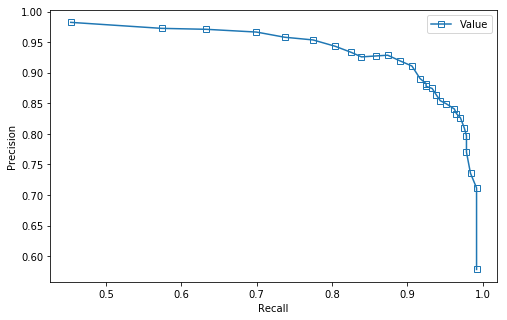

In [33]:
plt.figure(figsize=(8,5))
plt.plot(recall, precision, 's-', label='Value', ms=6.0, fillstyle='none')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.savefig(img_dir+'/precision_vs_recall.png', dpi=200)

In [135]:
# m.evaluate([g_train_x, l_train_x, train_features], train_y)

In [14]:
# m = load_model()

W0901 22:27:10.438807  1724 deprecation.py:506] From c:\users\user\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0901 22:27:10.440843  1724 deprecation.py:506] From c:\users\user\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0901 22:27:10.443807  1724 deprecation.py:506] From c:\users\user\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Ones.__i

loading model from C:\Users\User\dev\kepler\models\train.h5
Error loading model from C:\Users\User\dev\kepler\models\train.h5
"Unable to open object (object 'dense_101' doesn't exist)"


In [34]:
x, y = get_roc(m, [g_test_x, l_test_x, test_features], test_y)

In [35]:
auc(x, y)

0.9812098050552154

In [33]:
from dr25 import * 

In [36]:
test_kepid(m, '1026032', dr24=1)

{1: 0.8702718, 2: 0.043697417}

 100.00%

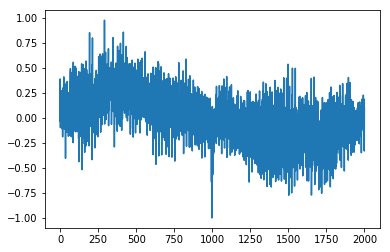

In [91]:
plt.plot(get_binned_normalized_flux_by_IDs('1161345')[0][0])

In [255]:
test_kepid(m, '9838975', dr24=1)

True
True


{1: 0.99538213, 2: 0.9994092}

In [86]:
f = get_binned_normalized_flux_by_IDs('892772', overwrite=1)[1]
f

 100.00%

array([[ 0.0008201 , -0.08243892, -0.10048007, ..., -0.11208442,
        -0.23992015, -0.07310106]])

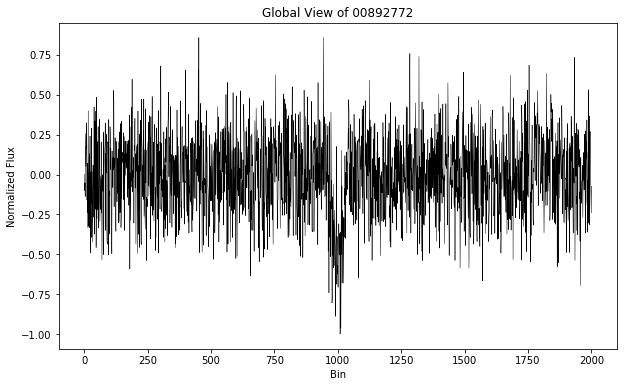

In [87]:
plt.figure(figsize=(10,6))
plt.xlabel('Bin')
plt.ylabel('Normalized Flux')
plt.title('Global View of 00892772')
plt.plot(f[0], lw=0.5, color='k')
plt.savefig(img_dir+'/892772_fp.png', dpi=200)

In [83]:
local = get_binned_local_view_by_IDs('892772', overwrite=1)[1]

loading 1/1

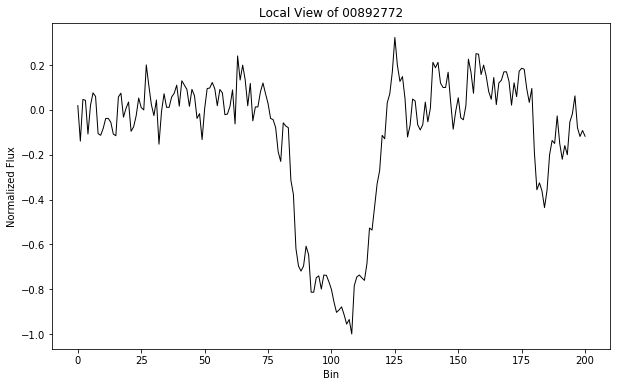

In [85]:
plt.figure(figsize=(10,6))
plt.xlabel('Bin')
plt.ylabel('Normalized Flux')
plt.title('Local View of 00892772')
plt.plot(local[0], lw=1.0, color='k')
plt.savefig(img_dir+'/892772_local_fp.png', dpi=200)

In [10]:
m.evaluate([g_train_x, l_train_x], train_y)

14163/14163 [==============================] - 4s 259us/sample - loss: 0.1411 - acc: 0.9883


[0.14114456367864706, 0.9883499]

In [92]:
g_pc = np.loadtxt(data_dir + '/all_PCs_flux.txt')
l_pc = np.loadtxt(data_dir + '/local_all_PCs_flux.txt')

g_pc=g_pc.reshape(*g_pc.shape, 1) 
l_pc=l_pc.reshape(*l_pc.shape, 1) 


In [93]:
g_non  = np.loadtxt(data_dir + '/all_Non_PCs_flux.txt')
l_non  = np.loadtxt(data_dir + '/local_all_Non_PCs_flux.txt')

g_non =g_non.reshape(*g_non.shape, 1) 
l_non =l_non.reshape(*l_non.shape, 1) 


In [233]:
np.concatenate([g_pc, g_non]).shape,np.concatenate([l_pc, l_non]).shape

((15737, 2001, 1), (15737, 201, 1))

In [237]:
m.evaluate([np.concatenate([g_pc, g_non]), np.concatenate([l_pc, l_non])],
    np.concatenate([np.ones(3600), np.zeros(len(g_non))]))

15737/15737 [==============================] - ETA: 4:05 - loss: 0.0670 - acc: 1.000 - ETA: 44s - loss: 0.1437 - acc: 0.958 - ETA: 26s - loss: 0.1595 - acc: 0.95 - ETA: 19s - loss: 0.1592 - acc: 0.95 - ETA: 15s - loss: 0.1684 - acc: 0.95 - ETA: 13s - loss: 0.1671 - acc: 0.95 - ETA: 12s - loss: 0.1675 - acc: 0.95 - ETA: 10s - loss: 0.1638 - acc: 0.95 - ETA: 9s - loss: 0.1647 - acc: 0.9554 - ETA: 9s - loss: 0.1848 - acc: 0.954 - ETA: 8s - loss: 0.1815 - acc: 0.955 - ETA: 7s - loss: 0.1786 - acc: 0.954 - ETA: 7s - loss: 0.1802 - acc: 0.951 - ETA: 7s - loss: 0.1809 - acc: 0.949 - ETA: 6s - loss: 0.1839 - acc: 0.947 - ETA: 6s - loss: 0.1883 - acc: 0.946 - ETA: 6s - loss: 0.1876 - acc: 0.947 - ETA: 5s - loss: 0.1885 - acc: 0.948 - ETA: 5s - loss: 0.1866 - acc: 0.949 - ETA: 5s - loss: 0.1888 - acc: 0.948 - ETA: 5s - loss: 0.1950 - acc: 0.946 - ETA: 5s - loss: 0.1876 - acc: 0.949 - ETA: 5s - loss: 0.1816 - acc: 0.951 - ETA: 4s - loss: 0.1749 - acc: 0.953 - ETA: 4s - loss: 0.1688 - acc: 0.955 -

[0.07602200746491751, 0.9860202]

In [238]:
m.evaluate([g_non, l_non], np.zeros(len(g_non)))

12137/12137 [==============================] - ETA: 3s - loss: 0.0353 - acc: 1.000 - ETA: 3s - loss: 0.0353 - acc: 1.000 - ETA: 3s - loss: 0.0499 - acc: 0.994 - ETA: 3s - loss: 0.0462 - acc: 0.996 - ETA: 3s - loss: 0.0435 - acc: 0.997 - ETA: 3s - loss: 0.0432 - acc: 0.997 - ETA: 3s - loss: 0.0442 - acc: 0.997 - ETA: 3s - loss: 0.0429 - acc: 0.997 - ETA: 3s - loss: 0.0427 - acc: 0.997 - ETA: 3s - loss: 0.0424 - acc: 0.997 - ETA: 3s - loss: 0.0418 - acc: 0.997 - ETA: 3s - loss: 0.0414 - acc: 0.997 - ETA: 3s - loss: 0.0410 - acc: 0.998 - ETA: 3s - loss: 0.0404 - acc: 0.998 - ETA: 3s - loss: 0.0401 - acc: 0.998 - ETA: 2s - loss: 0.0398 - acc: 0.998 - ETA: 2s - loss: 0.0395 - acc: 0.998 - ETA: 2s - loss: 0.0405 - acc: 0.998 - ETA: 2s - loss: 0.0403 - acc: 0.998 - ETA: 2s - loss: 0.0400 - acc: 0.998 - ETA: 2s - loss: 0.0400 - acc: 0.998 - ETA: 2s - loss: 0.0401 - acc: 0.998 - ETA: 2s - loss: 0.0399 - acc: 0.998 - ETA: 2s - loss: 0.0397 - acc: 0.998 - ETA: 2s - loss: 0.0397 - acc: 0.998 - ETA

[0.04072166560866142, 0.997693]

In [249]:
df[df['kepid']==4661634]

,kepid,tce_plnt_num,tce_rogue_flag,tce_period,tce_period_err,tce_time0bk,tce_time0bk_err,tce_impact,tce_impact_err,tce_duration,tce_duration_err,tce_depth,tce_depth_err,av_training_set
2450,4661634,1,NaN,73.8942,0.000005,159.901,0.000054,0.2543,0.002043,9.496,0.003661,217700.0,72.38,AFP
2451,4661634,2,NaN,73.8944,0.000050,142.939,0.000590,0.7741,0.002891,12.320,0.034720,22720.0,59.92,AFP


In [383]:
g = get_binned_normalized_flux_by_IDs('4661634', overwrite=1)[1][0]
g = g.reshape(*g.shape, 1)

 100.00%

In [263]:
l = get_binned_local_view_by_IDs('4661634', overwrite=1)[1][0]

loading 1/1

In [355]:
get_binned_normalized_PC_flux(2, return_kepids=1, overwrite=0)

 100.00%

(array([[-0.02869911, -0.03458117, -0.03357613, ..., -0.0522324 ,
          0.10145352,  0.02323417],
        [ 0.12723104,  0.02387044, -0.05180007, ..., -0.06799214,
         -0.12016237,  0.13925874],
        [-0.06642725, -0.07693028,  0.06105036, ..., -0.00718474,
         -0.06202927,  0.05778516],
        [-0.01670242, -0.00458813, -0.01932849, ...,  0.02437321,
         -0.02259685,  0.02511374]]), ['010166274', '010330115'])

In [357]:
get_binned_normalized_flux_by_IDs('010166274', overwrite=1)[0]

 100.00%

array([[-0.02869911, -0.03458117, -0.03357613, ..., -0.0522324 ,
         0.10145352,  0.02323417],
       [ 0.12723104,  0.02387044, -0.05180007, ..., -0.06799214,
        -0.12016237,  0.13925874],
       [-0.06642725, -0.07693028,  0.06105036, ..., -0.00718474,
        -0.06202927,  0.05778516]])

In [86]:
m.predict([g1, l1])

array([[0.14455462, 0.8554454 ]], dtype=float32)

In [87]:
m.predict([g_train_x[9164].reshape(1,2001,1), l_train_x[9164].reshape(1,201,1)])

array([[0.9891412 , 0.01085873]], dtype=float32)

In [139]:
for i, row in enumerate(l_train_x):
    row = row.reshape(1, *row.shape)
    if np.max(np.abs(row-l1))<1e-2:
        print(i)

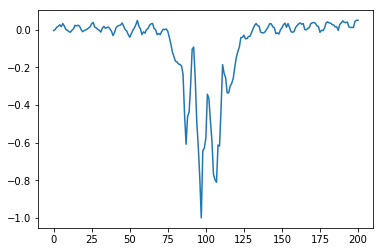

In [128]:
plt.plot(l1.ravel())

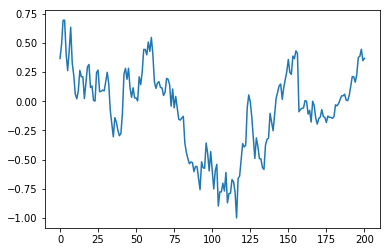

In [118]:
plt.plot(l_train_x[9164].ravel())

In [140]:
g1, l1 = test_kepid(m, '10006096', dr24=1)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [142]:
get_summary_by_IDs('10006096')

{
  "period": [
    [
      "0",
      70.516
    ],
    [
      "0",
      70.5199
    ]
  ],
  "tce duration": [
    [
      "0",
      0.10416666666666667
    ],
    [
      "0",
      1.6591666666666667
    ]
  ],
  "tce epoch": [
    [
      "0",
      142.86
    ],
    [
      "0",
      143.06
    ]
  ]
}


In [158]:
time, flux = get_time_flux_by_ID('10006096')

In [160]:
curtime, curflux = remove_points_other_tce(time, flux , 70.516, [70.516, 70.5199], [142.86, 143.06], 
                        [0.10416666666666667, 1.6591666666666667])

In [163]:
t, f = fold(curtime, curflux,70.516, 142.86%70.516,)

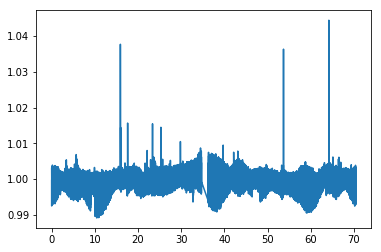

In [164]:
plt.plot(t,f )

In [162]:
choose_from_center(t, 70.516/2, 4 *0.10416666666666667)

(32162, 32162)